In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the data
with open('yelp_academic_dataset_review.json', encoding='utf-8') as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25


In [3]:
df_review.shape

(8635403, 9)

In [4]:
#dropping unnecessary columns
df_review.drop(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool','date'], axis=1, inplace=True)
df_review.head(5)

,stars,text
0,4.0,Apparently Prides Osteria had a rough summer a...
1,4.0,This store is pretty good. Not as great as Wal...
2,5.0,I called WVM on the recommendation of a couple...
3,2.0,I've stayed at many Marriott and Renaissance M...
4,4.0,The food is always great here. The service fro...


<AxesSubplot:ylabel='Frequency'>

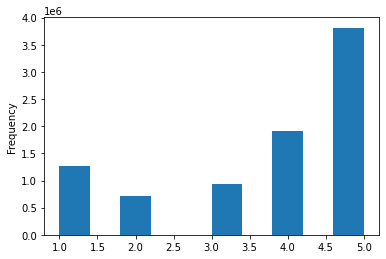

In [5]:
#plotting the stars rating distrubution
figure = plt.figure()

axes = figure.add_subplot(1, 1, 1)
axes.set_ylabel('Frequancy')

df_review['stars'].plot.hist()

In [6]:
# converting stars to 1/0 which is positive/negative 
df_review['stars'] = df_review['stars'].apply(lambda x:1 if x >= 3 else 0 if x <= 2 else None)
df_review.dropna(axis=0, inplace=True)
df_review.head(5)

,stars,text
0,1,Apparently Prides Osteria had a rough summer a...
1,1,This store is pretty good. Not as great as Wal...
2,1,I called WVM on the recommendation of a couple...
3,0,I've stayed at many Marriott and Renaissance M...
4,1,The food is always great here. The service fro...


<BarContainer object of 2 artists>

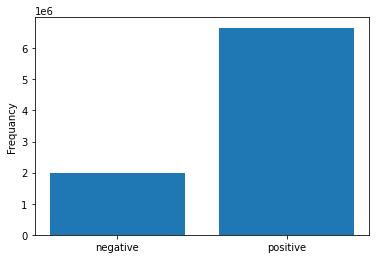

In [7]:
# plotting the pos/neg distrubution
plt.figure()

plt.ylabel('Frequancy')
plt.xticks([1, 0],['positive','negative'])

plt.bar([1, 0], df_review['stars'].value_counts())

In [8]:
# printing the precentage of positive entries
print('distrubution (precentage of positive data): {} %'.format((df_review['stars'].sum(axis=0)/df_review.shape[0])*100))

distrubution (precentage of positive data): 77.13855392736158 %


In [9]:
# changing 1/0 to positive/negative
df_review['stars'] = df_review['stars'].apply(lambda x:"positive" if x == 1 else 'negative' if x == 0 else None)
df_review.dropna(axis=0, inplace=True)
df_review.head(5)

,stars,text
0,positive,Apparently Prides Osteria had a rough summer a...
1,positive,This store is pretty good. Not as great as Wal...
2,positive,I called WVM on the recommendation of a couple...
3,negative,I've stayed at many Marriott and Renaissance M...
4,positive,The food is always great here. The service fro...


In [10]:
# saving the data to be used later on
df_review.to_pickle('yelp_dataset_reviews.pkl')
df_review.to_csv('yelp_dataset_reviews.csv')

In [11]:
df1 = pd.read_pickle('yelp_dataset_reviews.pkl')
df1.head(10)

,stars,text
0,positive,Apparently Prides Osteria had a rough summer a...
1,positive,This store is pretty good. Not as great as Wal...
2,positive,I called WVM on the recommendation of a couple...
3,negative,I've stayed at many Marriott and Renaissance M...
4,positive,The food is always great here. The service fro...
5,negative,"This place used to be a cool, chill place. Now..."
6,negative,"The setting is perfectly adequate, and the foo..."
7,positive,Probably one of the better breakfast sandwiche...
8,positive,I am definitely a fan of Sports Authority. Th...
9,positive,I work in the Pru and this is the most afforda...
